Task-3: Cuisine Classification

Classify restaurants based on their cuisines using machine learning

Step-1: Preprocessing the dataset

1. Import required libraries
2. Load the dataset
3. Handle missing values
4. Encoding Categorical columns

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv("C:/Users/KAVYA/Documents/Dataset .csv")

In [3]:
imputer=SimpleImputer(strategy='most_frequent')
df=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [4]:
Categorical_cols=df.select_dtypes(include='object').columns
label_encoders={}
for col in Categorical_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le

Step-2:Split the data into training and test sets(80-20 split)

In [5]:
X=df.drop('Cuisines',axis=1)
y=df['Cuisines']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Step-3: Select & Train a Classification Algorithm

Choosing Random Forest Classifier 

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Step-4:Model Evaluation

Evaluate using accuracy,precision,recall and F1-score

In [7]:
from sklearn.metrics import classification_report
rf_preds=rf.predict(X_test)
print("Random Forest Classification Report:\n",classification_report(y_test,rf_preds))

Random Forest Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           6       0.10      0.20      0.13         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00

C:\Users\KAVYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KAVYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KAVYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

Step-5: Analysis of Model Performance

Analyze performance across cuisines

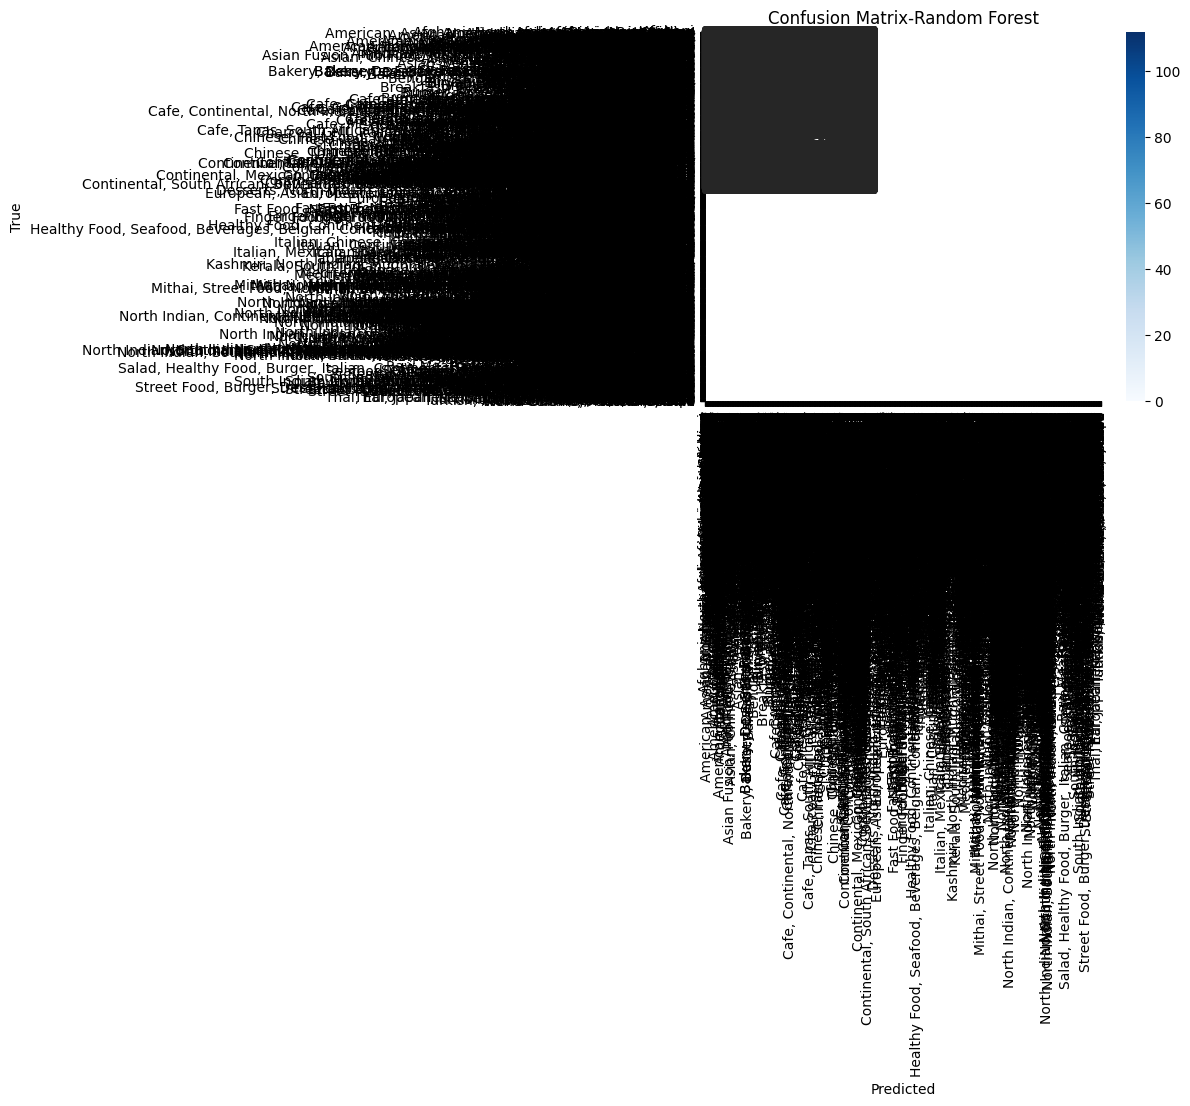

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,rf_preds)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=label_encoders['Cuisines'].classes_,
            yticklabels=label_encoders['Cuisines'].classes_)
plt.title('Confusion Matrix-Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Challenges and Observations:

High Dimensionality: One-hot encoding led to thousands of columns, making training slow.

Memory Usage: Random Forest failed due to lack of system RAM.

Class Imbalance: Some cuisine categories had fewer samples, lowering accuracy.

Multiclass Complexity: More classes meant more time and computation for one-vs-rest models.